In [22]:
import cv2 as cv
import os
import json
import requests
from matplotlib import pyplot as plt
import face_recognition

In [4]:
os.chdir("../kadri")

In [40]:
# read facescrub_actors.txt
def organize_metadata():
    images = []

    with open("metadata/facescrub_actors.txt", "r") as file:
        # get the first line
        cols = file.readline().strip().split("\t")
        # create a dictionary for each column

        images = {}

        for line in file:
            # get the name of the image
            name = line.split("\t")[0]
            # get the name count
            # append the image to the images dictionary
            if name not in images:
                count = 1
                images[name] = []
            info = {}
            info["id"] = count
            info["image_id"] = line.split("\t")[2]
            info["url"] = line.split("\t")[3]
            info["face_location"] = {
                "x1": line.split("\t")[4].split(",")[0],
                "y1": line.split("\t")[4].split(",")[1],
                "x2": line.split("\t")[4].split(",")[2],
                "y2": line.split("\t")[4].split(",")[3]
            }
            images[name].append(info)
            count += 1

    with open("metadata/facescrub_actresses.txt", "r") as file:
        # get the first line
        cols = file.readline().strip().split("\t")
        # create a dictionary for each column

        for index, line in enumerate(file):
            # get the name of the image
            name = line.split("\t")[0]
            # get the name count
            # append the image to the images dictionary
            if name not in images:
                count = 1
                images[name] = []
            info = {}
            info["image_id"] = count
            info["id"] = line.split("\t")[2]
            info["url"] = line.split("\t")[3]
            info["face_location"] = {
                "x1": line.split("\t")[4].split(",")[0],
                "y1": line.split("\t")[4].split(",")[1],
                "x2": line.split("\t")[4].split(",")[2],
                "y2": line.split("\t")[4].split(",")[3]
            }
            images[name].append(info)
            count += 1

    return images



In [12]:
headers = {'User-Agent': 'Mozilla/5.0'}
def download_image(url, save_path, timeout=5):
    try:
        # Send a GET request to the URL
        response = requests.get(url, headers=headers, timeout=timeout)
        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Open the file in binary write mode and write the content
            print("Downloading image...")
            print(response.content)
            binary_content = str(binary_content)
            if "DOCTYPE" in binary_content:
                print("This is not a PNG file")
            else:
                print("This is a PNG file")
            with open(save_path, 'wb') as f:
                f.write(response.content)
            print("Image downloaded successfully!")
            return True
        else:
            print("Failed to download image. Status code:", response.status_code)
            return False
    except requests.Timeout:
        print("Request timed out after", timeout, "seconds.")
    except Exception as e:
        print("An error occurred:", str(e))
        return False

In [13]:
os.getcwd()

'/Users/kadrigofralilar/Desktop/tests/a_test'

In [18]:
# read 
os.chdir("../kadri/org_images")

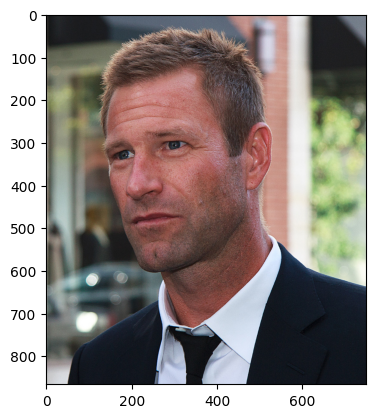

In [23]:
img = cv.imread("Aaron Eckhart/1.jpg")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [48]:
def clean_corrupted_images():
    for root, dirs, files in os.walk("."):
        for dir in dirs:
            for file in os.listdir(dir):
                try:
                    img = cv.imread(os.path.join(dir, file))
                    if img is None:
                        print("Image is corrupted. Deleting...", os.path.join(dir, file))
                        os.remove(os.path.join(dir, file))
                except Exception as e:
                    print("An error occurred:", str(e))

clean_corrupted_images()

Root: .
Dirs: ['Jessica Biel', 'Justin Timberlake', 'Alley Mills', 'Shannon Kane', 'Victoria Justice', 'Nancy Lee Grahn', 'Denise Crosby', 'Jill Hennessy', 'Giovanni Ribisi', 'Shelley Hennig', 'Robert Downey Jr.', 'Gabrielle Carteris', 'Amy Davidson', 'Tobey Maguire', 'Michael Vartan', 'Marcia Cross', 'Adrianne León', 'Brad Pitt', 'Brendan Fraser', 'Jet Li', 'Elizabeth Hendrickson', 'Ellen DeGeneres', 'Chris Rock', 'Aisha Hinds', 'Steve Carell', 'Kiefer Sutherland', 'Shelley Hack', 'Billy Bob Thornton', 'James McAvoy', 'Elijah Wood', 'Annie Ilonzeh', 'Sara Gilbert', 'Lisa Kudrow', 'Ben McKenzie', 'Natalie Martinez', 'Lea Michele', 'Morena Baccarin', 'Melissa Claire Egan', 'Kit Harington', 'Erin Chambers', 'Michael Douglas', 'David Cross', 'Danny Glover', 'Kristen Johnston', 'Kassie DePaiva', 'Joanna Kerns', 'Chazz Palminteri', 'Josie Bissett', 'Tamara Braun', 'Dean Cain', 'Leslie Neilsen', 'Billy Boyd', 'Caroline Dhavernas', 'Jesse Eisenberg', 'Portia Doubleday', 'Victor Garber', 'Cali

libpng warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 183 extraneous bytes before marker 0xd9
Premature end of JPEG file
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Root: ./Jessica Biel
Dirs: []
Files: ['7246.jpg', '7254.jpg', '7249.jpg']
Root: ./Justin Timberlake
Dirs: []
Files: ['9.jpg', '5.jpg', '3.jpg']
Root: ./Alley Mills
Dirs: []
Files: ['51942.jpg', '51944.jpg', '51946.jpg']
Root: ./Shannon Kane
Dirs: []
Files: ['39604.jpg', '39610.jpg', '39605.jpg']
Root: ./Victoria Justice
Dirs: []
Files: ['39021.jpg', '39025.jpg', '39026.jpg']
Root: ./Nancy Lee Grahn
Dirs: []
Files: ['30583.jpg', '30585.jpg', '30589.jpg']
Root: ./Denise Crosby
Dirs: []
Files: ['16579.jpg', '16578.jpg', '16577.jpg']
Root: ./Jill Hennessy
Dirs: []
Files: ['34871.jpg', '34870.jpg', '34873.jpg']
Root: ./Giovanni Ribisi
Dirs: []
Files: ['7.jpg', '2.jpg', '1.jpg']
Root: ./Shelley Hennig
Dirs: []
Files: ['35140.jpg', '35146.jpg']
Root: ./Robert Downey Jr.
Dirs: []
Files: ['4.jpg', '5.jpg', '3.jpg']
Root: ./Gabrielle Carteris
Dirs: []
Files: ['12522.jpg', '12520.jpg', '12525.jpg']
Root: ./Amy Davidson
Dirs: []
Files: ['18454.jpg', '18451.jpg', '18460.jpg']
Root: ./Tobey Maguire


In [41]:
# read png file in Aaron Eckhart as txt

with open("Aisha Hinds/35710.jpg", 'rb') as file:
    # Read the binary content of the file
    binary_content = file.read()

# Decode the binary content into text using UTF-8 encoding

# Print the decoded text content
print(binary_content[0:100])

# convert the binary content to a string
binary_content = str(binary_content)
if "DOCTYPE" in binary_content:
    print("This is not a PNG file")
else:
    print("This is a PNG file")

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x0c\x08\x08\x08\t\x08\x0c\t\t\x0c\x11\x0b\n\x0b\x11\x15\x0f\x0c\x0c\x0f\x15\x18\x13\x13\x15\x13\x13\x18\x11\x0c\x0c\x0c\x0c\x0c\x0c\x11\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\xff\xdb\x00C\x01\r\x0b\x0b\r\x0e\r'
This is a PNG file


In [39]:
# read png file in Aaron Eckhart as txt

with open("Aisha Hinds/35704.jpg", 'rb') as file:
    # Read the binary content of the file
    binary_content = file.read()

# Decode the binary content into text using UTF-8 encoding

# Print the decoded text content
print(binary_content[0:100])
# convert the binary content to a string
binary_content = str(binary_content)
if "DOCTYPE" in binary_content:
    print("This is not a PNG file")

b'<!DOCTYPE html><html><head><script>window.onload=function(){window.location.href="/lander"}</script>'
This is not a PNG file


In [17]:
download_image("http://www.telefilmzone.it/imgImmagini/Attori/AishaHinds/aisha4.jpg", "test.jpg")

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"\n        "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\n    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1">\n    <title>telefilmzone.it</title>\n            <style media="screen">\n#sale_link,\n#sale_link_bold,\n#sale_link_below {\n    color: rgb(0,0,0);\n    text-align: right;\n    font: 14px arial, sans-serif;\n    height: 20px;\n    padding: 10px 0 5px 0;\n    width: 900px;\n    margin: 0 auto;\n    z-index: 20;\n}\n#sale_link a,\n#sale_link_below a {\n    text-decoration: underline;\n    color: rgb(0,0,0);\n    font-size: 14px;\n}\n#sale_link_bold a {\n\tfont-weight: bold;\n    text-decoration: underline;\n    color: rgb(0,0,0);\n    font-size: 14px;\n}\n#sale_link a:hover,\n#sale_link_bold a:hover,\n#sale_link_below a:

True

In [16]:
download_image("http://images2.wikia.nocookie.net/__cb20100926063425/trueblood/images/e/ef/AishaHinds.jpg", "test.jpg")

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x0c\x08\x08\x08\t\x08\x0c\t\t\x0c\x11\x0b\n\x0b\x11\x15\x0f\x0c\x0c\x0f\x15\x18\x13\x13\x15\x13\x13\x18\x11\x0c\x0c\x0c\x0c\x0c\x0c\x11\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\xff\xdb\x00C\x01\r\x0b\x0b\r\x0e\r\x10\x0e\x0e\x10\x14\x0e\x0e\x0e\x14\x14\x0e\x0e\x0e\x0e\x14\x11\x0c\x0c\x0c\x0c\x0c\x11\x11\x0c\x0c\x0c\x0c\x0c\x0c\x11\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\xff\xc0\x00\x11\x08\x00\xfa\x00\xa7\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x00\x02\x03\x01\x06\x07\xff\xc4\x00F\x10\x00\x02\x01\x03\x02\x03\x05\x03\x08\x07\x06\x04\x07\x00\x00\x00\x01\x02\x03\x00\x04\x11\x12!\x051A\x13"2QaBq\x81\x06\x14#3Rbr\x91C\x82\xa1\xa2\xb1\xc1\xc2\x07\x15\x92\xd1\xd2\xf0S\xb2\xe1\xf2$4Ds\x

True

In [42]:
def show_image(name, image, x1, y1, x2, y2):
    image = cv.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(name)
    plt.show()

In [46]:
os.getcwd()

'/Users/kadrigofralilar/Desktop/tests/kadri'

In [45]:
os.chdir("..")

In [48]:
metadata_fixed = False

if os.path.isfile("images.json"):
    metadata_fixed = True
    print("Metadata is fixed. Loading images from json file.")

if not metadata_fixed:
    with open("images.json", "w") as file:
        json.dump(organize_metadata(), file, indent=4)
else:
    if os.path.isfile("images.json"):
        with open("images.json", "r") as file:
            images = json.load(file)

Metadata is fixed. Loading images from json file.


In [38]:
os.chdir("org_images")

'/Users/kadrigofralilar/Desktop/tests/kadri'

In [69]:
os.chdir("org_images")
got_images = True
# check if the images are already downloaded
for name, image_data in images.items():
    if os.path.isdir(name):
        count = len(os.listdir(name))
    if count < 3:
        print(name , " has less than 3 images.")
        got_images = False

In [72]:
if not got_images:
    for name, image_data in images.items():
        if not os.path.isdir(name):
            os.mkdir(name)
        counter = 0
        for image in image_data:
            print(name, image["id"])
            if counter == 3:
                break
            if os.path.isfile(f"{name}/{image['id']}.jpg"):
                counter += 1
                continue
            success = download_image(image["url"], f"{name}/{image['id']}.jpg")
            if success:
                counter += 1

os.chdir("..")

{'x1': '203', 'y1': '802', 'x2': '975', 'y2': '1574'}


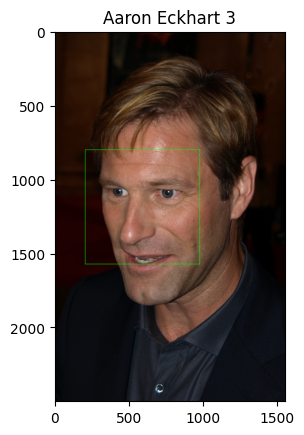

In [73]:
json_file = "images.json"

with open(json_file, "r") as file:
    file = json.load(file)
    # read the first line   
    face = file["Aaron Eckhart"][2]["face_location"]
    print(face)
    show_image("Aaron Eckhart 3", cv.imread("org_images/Aaron Eckhart/3.jpg"), face["x1"], face["y1"], face["x2"], face["y2"])

In [110]:
os.getcwd()

'/Users/kadrigofralilar/Desktop/tests/kadri'

In [111]:
os.chdir("org_images")

In [133]:
for name, image_data in images.items():
    # get the type of the id
    print(name, type(image_data[0]["id"]))
    if type(image_data[0]["id"]) == str:
        print("Converting id to int")
        break

Aaron Eckhart <class 'int'>
Adam Brody <class 'int'>
Adam McKay <class 'int'>
Adam Sandler <class 'int'>
Adrien Brody <class 'int'>
Al Pacino <class 'int'>
Alan Alda <class 'int'>
Alan Arkin <class 'int'>
Alan Rickman <class 'int'>
Alec Baldwin <class 'int'>
Alexander Skarsgård <class 'int'>
Alfred Molina <class 'int'>
Amaury Nolasco <class 'int'>
Andy Garcia <class 'int'>
Andy Richter <class 'int'>
Andy Serkis <class 'int'>
Anthony Hopkins <class 'int'>
Anthony Stewart Head <class 'int'>
Antonio Banderas <class 'int'>
Arnold Schwarzenegger <class 'int'>
Arnold Vosloo <class 'int'>
Ashton Kutcher <class 'int'>
Ben Affleck <class 'int'>
Ben Kingsley <class 'int'>
Ben McKenzie <class 'int'>
Ben Stiller <class 'int'>
Benicio Del Toro <class 'int'>
Bernard Hill <class 'int'>
Bernie Mac <class 'int'>
Bill Cosby <class 'int'>
Bill Hader <class 'int'>
Bill Murray <class 'int'>
Bill Nighy <class 'int'>
Billy Bob Thornton <class 'int'>
Billy Boyd <class 'int'>
Billy Burke <class 'int'>
Billy Za

In [175]:
# get into org_images
# rename the file if it is given as id instead of image_id

def test():
    for name, image_data in images.items():
        new_id = "image_id"
        if type(image_data[0]["id"]) == str:
            new_id = "id"
        if os.path.isdir(name):
            names = os.listdir(name)
            for namee in names:
                id = namee.split(".")[0]
                # rename image_data[int(id)-1]["id"] to image_data[int(id)-1][new_id]
                os.rename(f"{name}/{namee}", f"{name}/{image_data[int(id)-1][new_id]}.jpg")

        
test()

IndexError: list index out of range

In [162]:
# turn image.items() into a list

image_list = list(images.items())
print(image_list[350])

('Erin Cummings', [{'image_id': 1, 'id': '17265', 'url': 'http://static1.wikia.nocookie.net/__cb20130430193221/spartacus/fr/images/2/20/Erin_Cummings.jpg', 'face_location': {'x1': '209', 'y1': '219', 'x2': '595', 'y2': '605'}}, {'image_id': 2, 'id': '17266', 'url': 'http://theinsightpictures.net/wp-content/uploads/2013/10/retro-hairstyleerin-cummings-retro-hairstyle---erin-cummings-looks---stylebistro-xlbqhmpy.jpg', 'face_location': {'x1': '130', 'y1': '122', 'x2': '333', 'y2': '325'}}, {'image_id': 3, 'id': '17267', 'url': 'http://cdn3-www.shocktillyoudrop.com/assets/uploads/2013/10/file_176753_0_erin_cummings.jpg', 'face_location': {'x1': '66', 'y1': '78', 'x2': '188', 'y2': '200'}}, {'image_id': 4, 'id': '17268', 'url': 'http://i2.listal.com/image/4217181/936full-erin-cummings.jpg', 'face_location': {'x1': '323', 'y1': '222', 'x2': '641', 'y2': '540'}}, {'image_id': 5, 'id': '17269', 'url': 'http://ilarge.listal.com/image/3176102/936full-erin-cummings.jpg', 'face_location': {'x1': '

In [194]:
os.chdir("org_images")

In [69]:
import cv2 as cv
import os
import json
import requests
import face_recognition
from matplotlib import pyplot as plt
import random

json_file = "images.json"

downloaded_images_json = "downloaded_images.json"


def organize_metadata():

    if os.path.isfile(json_file):
        print("Metadata is organized. Loading images from json file.")
        return json.load(open(json_file, "r"))

    images = []
    if not os.path.isdir("metadata"):
        print("Metadata folder not found.")
        return images
    elif not os.path.isfile("metadata/facescrub_actors.txt"):
        print("facescrub_actors.txt not found.")
        return images
    elif not os.path.isfile("metadata/facescrub_actresses.txt"):
        print("facescrub_actresses.txt not found.")
        return images
    
    with open("metadata/facescrub_actors.txt", "r") as file:
        cols = file.readline().strip().split("\t")

        images = {}

        for line in file:
            name = line.split("\t")[0]
            if name not in images:
                count = 1
                images[name] = []
            info = {}
            info["id"] = count
            info["image_id"] = line.split("\t")[2]
            info["url"] = line.split("\t")[3]
            info["face_location"] = {
                "x1": line.split("\t")[4].split(",")[0],
                "y1": line.split("\t")[4].split(",")[1],
                "x2": line.split("\t")[4].split(",")[2],
                "y2": line.split("\t")[4].split(",")[3]
            }
            images[name].append(info)
            count += 1

    with open("metadata/facescrub_actresses.txt", "r") as file:
        cols = file.readline().strip().split("\t")

        for index, line in enumerate(file):
            name = line.split("\t")[0]
            if name not in images:
                count = 1
                images[name] = []
            info = {}
            info["image_id"] = count
            info["id"] = line.split("\t")[2]
            info["url"] = line.split("\t")[3]
            info["face_location"] = {
                "x1": line.split("\t")[4].split(",")[0],
                "y1": line.split("\t")[4].split(",")[1],
                "x2": line.split("\t")[4].split(",")[2],
                "y2": line.split("\t")[4].split(",")[3]
            }
            images[name].append(info)
            count += 1

    json.dump(images, open(json_file, "w"), indent=4)

    return images

def download_image(images, timeout=5, headers={'User-Agent': 'Mozilla/5.0'}):
    
    os.chdir("org_images")
    downloaded_images = {}

    for name, image_data in images.items():
        # name = "Aaron Eckhart"
        # image_data = images[name] (list of images for Aaron Eckhart)
        
        got_images = True

        if not os.path.isdir(name):
            os.mkdir(name)
        if len(os.listdir(name)) < 3:
            print("\n", name , " has less than 3 images.\n")
            got_images = False
        if got_images:
            files = os.listdir(name)
            for file in files:
                if name in downloaded_images:
                    downloaded_images[name].append(file.split(".")[0])
                else:
                    downloaded_images[name] = [file.split(".")[0]]
        if not got_images:
            counter = 0
            for image in image_data:
                save_path = f"{name}/{image['id']}.jpg"
                if counter == 3:
                    break
                if os.path.isfile(save_path):
                    downloaded_images.append(save_path)
                    counter += 1
                    continue
                try:
                    response = requests.get(image["url"], headers=headers, timeout=timeout)
                    # Check if the request was successful (status code 200)
                    if response.status_code == 200:
                        # Open the file in binary write mode and write the content
                        binary_content = str(response.content)
                        if "DOCTYPE" in binary_content or "html" in binary_content or "doctype" in binary_content or "HTML" in binary_content:
                            continue
                        with open(save_path, 'wb') as f:
                            f.write(response.content)
                        print("\nImage downloaded successfully!", save_path, "\n")
                        downloaded_images.append(save_path)
                        counter += 1
                    else:
                        print("Failed to download image. Status code:", response.status_code)
                except requests.Timeout:
                    print("Request timed out after", timeout, "seconds.")
                except Exception as e:
                    print("An error occurred:", str(e)[0:50])
    # save the downloaded images to a json file
    json.dump(downloaded_images, open(downloaded_images_json, "w"), indent=4)
    os.chdir("..")
    
def show_image(image, x1, y1, x2, y2, title="Bounding Box", bbox=True):
    if bbox:
        image = cv.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.show()

def get_eye_cascade():
    eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_eye.xml")
    return eye_cascade

images = organize_metadata()

download_image(images)

Metadata is organized. Loading images from json file.


In [184]:
def organize_metadata():


    images = []
    if not os.path.isdir("metadata"):
        print("Metadata folder not found.")
        return images
    elif not os.path.isfile("metadata/facescrub_actors.txt"):
        print("facescrub_actors.txt not found.")
        return images
    elif not os.path.isfile("metadata/facescrub_actresses.txt"):
        print("facescrub_actresses.txt not found.")
        return images
    
    with open("metadata/facescrub_actors.txt", "r") as file:
        cols = file.readline().strip().split("\t")

        images = {}

        for line in file:
            name = line.split("\t")[0]
            if name not in images:
                count = 1
                images[name] = []
            info = {}
            info["id"] = count
            info["image_id"] = line.split("\t")[2]
            info["url"] = line.split("\t")[3]
            info["face_location"] = {
                "x1": line.split("\t")[4].split(",")[0],
                "y1": line.split("\t")[4].split(",")[1],
                "x2": line.split("\t")[4].split(",")[2],
                "y2": line.split("\t")[4].split(",")[3]
            }
            images[name].append(info)
            count += 1

    with open("metadata/facescrub_actresses.txt", "r") as file:
        cols = file.readline().strip().split("\t")

        for index, line in enumerate(file):
            name = line.split("\t")[0]
            if name not in images:
                count = 1
                images[name] = []
            info = {}
            info["id"] = count
            info["image_id"] = line.split("\t")[2]
            info["url"] = line.split("\t")[3]
            info["face_location"] = {
                "x1": line.split("\t")[4].split(",")[0],
                "y1": line.split("\t")[4].split(",")[1],
                "x2": line.split("\t")[4].split(",")[2],
                "y2": line.split("\t")[4].split(",")[3]
            }
            images[name].append(info)
            count += 1

    json.dump(images, open(json_file, "w"), indent=4)

    return images

images = organize_metadata()

In [182]:
# read images.json
images = json.load(open("images.json", "r"))

In [247]:
def salient_features(image_path, output_path, face):
    # Load the image
    image = cv.imread(image_path)
    if image is None:
        print("Image not found")
        return

    if not os.path.isfile(output_path):
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    faces = face

    # Apply aggressive feature obfuscation while maintaining recognizability for humans
    for (x1, y1, x2, y2) in faces:
        # Extract the face region
        face_region = image[y1:y2, x1:x2]
        h = y2 - y1
        w = x2 - x1
        face_reg1 = face_region.copy()

        # Detect the eyes
        eye_cascade = get_eye_cascade()
        eyes = eye_cascade.detectMultiScale(face_region, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        # Darken the eyes
        for (ex, ey, ew, eh) in eyes:
            face_region[ey:ey + eh, ex:ex + ew] = [0, 0, 0]
        face_reg2 = face_region.copy()

        # print where the difference is
        diff = cv.subtract(face_reg1, face_reg2)
        # show_image(diff, x1, y1, x2, y2, "Difference", bbox=False)
        # Replace the face region with the modified one
        image[y1:y2, x1:x2] = face_region

    # Save the modified image
    cv.imwrite(output_path, image)

In [248]:
def bbox(image_path, output_path, face):
    # Load the image
    image = cv.imread(image_path)
    if image is None:
        print("Image not found")
        return
    
    if not os.path.isfile(output_path):
        os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Detect faces in the image
    faces = face

    # Apply boundary box obfuscation with modified appearance
    for (x1, y1, x2, y2) in faces:
        # Draw a thicker white rectangle around the face region
        cv.rectangle(image, (x1-10, y1-10), (x2+10, y2+10), (255, 255, 255), 2)  # White rectangle with thickness 2
        # Draw a thinner black rectangle inside the white one
        cv.rectangle(image, (x1, y1), (x2, y2), (0, 0, 0), 1)  # Black rectangle with thickness 1

    # Save the modified image
    cv.imwrite(output_path, image)

In [250]:
os.getcwd()

'/Users/kadrigofralilar/Desktop/tests/kadri'

In [252]:
# get 200 random people
# if chosen_people.json exists, load the chosen people from the json file
if os.path.isfile("chosen_people.json"):
    chosen_people = json.load(open("chosen_people.json", "r"))
else:
    people = list(images.keys())
    chosen_people = random.sample(people, 200)
    json.dump(chosen_people, open("chosen_people.json", "w"), indent=4)

# read downloaded images
downloaded_images = json.load(open(downloaded_images_json, "r"))

# get the first image of each person from the downloaded images
chosen_images = {}
for person in chosen_people:
    for image in downloaded_images:
        if person in image:
            chosen_images[person] = downloaded_images[image][0:2]
            break

print(chosen_images)

{'Matt Long': ['41849', '41851'], 'McKayla Maroney': ['47457', '47458'], 'Kathy Griffin': ['31010', '31014'], 'Kimberly McCullough': ['49163', '49162'], 'Chyler Leigh': ['43274', '43272'], 'Norman Reedus': ['45440', '45443'], 'Valerie Harper': ['32573', '32571'], 'Rupert Grint': ['50982', '50981'], 'Matt Czuchry': ['40937', '40939'], 'David Wenham': ['16135', '16136'], 'Erin Chambers': ['13676', '13680'], 'Michael Landes': ['43622', '43615'], 'Patrick Warburton': ['46897', '46898'], 'Andrea Bowen': ['8851', '8850'], 'Jaden Smith': ['25466', '25470'], 'Adrien Brody': ['751', '757'], 'Lisa Kudrow': ['40907', '40903'], 'Jenilee Harrison': ['32839', '32831'], 'Sean Bean': ['52672', '52667'], 'Loni Anderson': ['2060', '2058'], 'Peri Gilpin': ['29400', '29398'], 'Daniel Radcliffe': ['14551', '14553'], 'Jane Krakowski': ['40476', '40474'], 'Jennette McCurdy': ['49282', '49285'], 'Jill Hennessy': ['34871', '34870'], 'Christel Khalil': ['40195', '40196'], 'Jason Statham': ['28401', '28404'], 'D

In [296]:
correct_matches = 0
total_matches = 0

In [262]:
# read images.json
images = json.load(open(json_file, "r"))

for i in chosen_images:
    for j in chosen_images[i]:
        try:
            img = cv.imread(f"org_images/{i}/{j}.jpg")
            image_data = images[i]
            for image in image_data:
                if image["image_id"] == j:
                    face = image["face_location"]
                    # show_image(img, face["x1"], face["y1"], face["x2"], face["y2"], i, True)
                    salient_features(f"org_images/{i}/{j}.jpg", f"salient/{i}_{j}.jpg", [(int(face["x1"]), int(face["y1"]), int(face["x2"]), int(face["y2"]))])
                    bbox(f"org_images/{i}/{j}.jpg", f"bbox/{i}_{j}.jpg", [(int(face["x1"]), int(face["y1"]), int(face["x2"]), int(face["y2"]))])
        except Exception as e:
            print("An error occurred:", str(e))
            break

In [291]:
all_images = {}

for i in chosen_images:
    for j in chosen_images[i]:
        image_data = images[i]
        for image in image_data:
            if image["image_id"] == j:
                face = image["face_location"]
                break
        # get the original image
        img = cv.imread(f"org_images/{i}/{j}.jpg")
        # get the salient image
        salient = cv.imread(f"salient/{i}_{j}.jpg")
        # get the bbox image
        bbox = cv.imread(f"bbox/{i}_{j}.jpg")
        # show the images
        # show_image(img, 0, 0, 0, 0, f"{i} Original")
        # show_image(salient, 0, 0, 0, 0, f"{i} Salient")
        # show_image(bbox, 0, 0, 0, 0, f"{i} Bbox")
        if i not in all_images:
            all_images[i] = {}
        all_images[i][j] = {
            "original": img,
            "salient": salient,
            "bbox": bbox,
            "face": [(int(face["x1"]), int(face["y1"]), int(face["x2"]), int(face["y2"]))]
        }

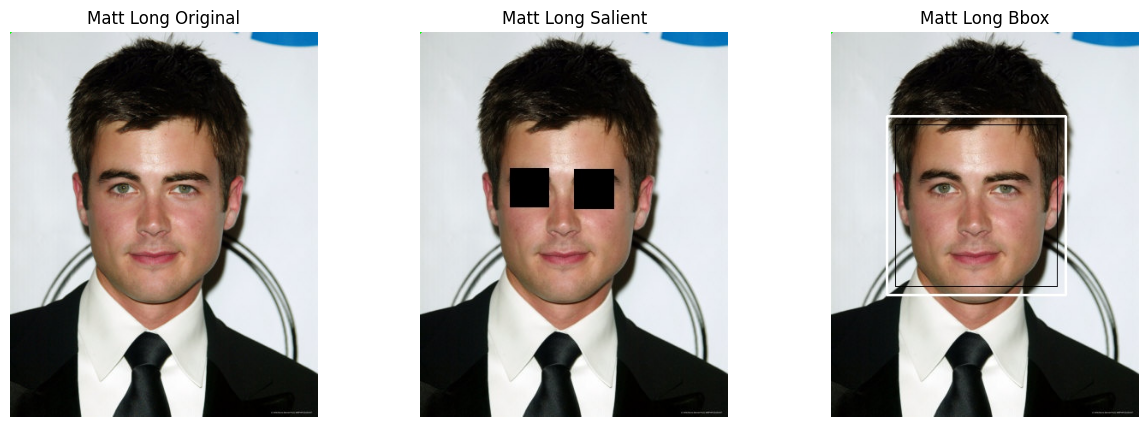

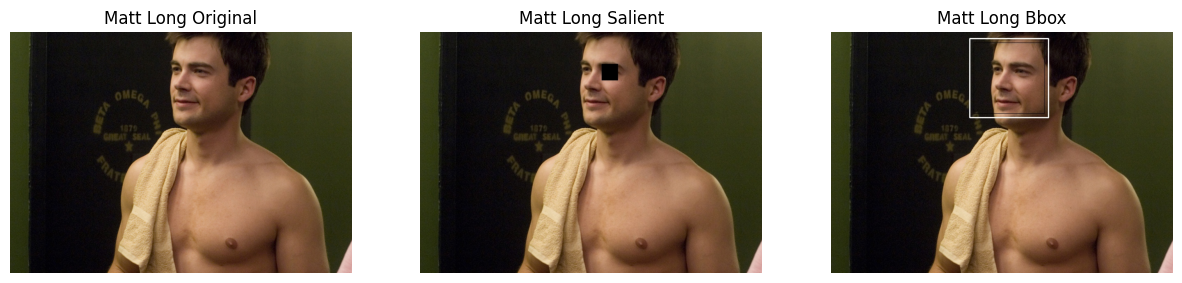

In [270]:
for key, value in all_images.items():
    originals = []
    salients = []
    bboxes = []
    for k, v in value.items():
        originals.append(v["original"])
        salients.append(v["salient"])
        bboxes.append(v["bbox"])
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(cv.cvtColor(originals[0], cv.COLOR_BGR2RGB))
    ax[0].set_title(f"{key} Original")
    ax[0].axis("off")
    ax[1].imshow(cv.cvtColor(salients[0], cv.COLOR_BGR2RGB))
    ax[1].set_title(f"{key} Salient")
    ax[1].axis("off")
    ax[2].imshow(cv.cvtColor(bboxes[0], cv.COLOR_BGR2RGB))
    ax[2].set_title(f"{key} Bbox")
    ax[2].axis("off")
    plt.show()



    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(cv.cvtColor(originals[1], cv.COLOR_BGR2RGB))
    ax[0].set_title(f"{key} Original")
    ax[0].axis("off")
    ax[1].imshow(cv.cvtColor(salients[1], cv.COLOR_BGR2RGB))
    ax[1].set_title(f"{key} Salient")
    ax[1].axis("off")
    ax[2].imshow(cv.cvtColor(bboxes[1], cv.COLOR_BGR2RGB))
    ax[2].set_title(f"{key} Bbox")
    ax[2].axis("off")
    plt.show()
    break


In [301]:
correct_matches_salient = 0
total_matches_salient = 0

correct_matches_bbox = 0
total_matches_bbox = 0

correct_matches_salient_bbox = 0
total_matches_salient_bbox = 0

In [302]:
for key, value in all_images.items():
    originals = []
    salients = []
    bboxes = []
    face_locations = []
    for k, v in value.items():
        originals.append(v["original"])
        salients.append(v["salient"])
        bboxes.append(v["bbox"])
        face_locations.append(v["face"])

    reference_image = cv.cvtColor(originals[0], cv.COLOR_BGR2RGB)
    reference_face_encoding = face_recognition.face_encodings(reference_image, known_face_locations=face_locations[0])[0]

    test_image_salient = cv.cvtColor(salients[1], cv.COLOR_BGR2RGB)
    test_face_encoding_salient = face_recognition.face_encodings(test_image_salient, known_face_locations=face_locations[1])[0]

    test_image_bbox = cv.cvtColor(bboxes[1], cv.COLOR_BGR2RGB)
    test_face_encoding_bbox = face_recognition.face_encodings(test_image_bbox, known_face_locations=face_locations[1])[0]

    match = face_recognition.compare_faces([reference_face_encoding], test_face_encoding_salient)
    if match[0]:
        correct_matches_salient += 1
    total_matches_salient += 1

    match = face_recognition.compare_faces([reference_face_encoding], test_face_encoding_bbox)
    if match[0]:
        correct_matches_bbox += 1
    total_matches_bbox += 1

    match = face_recognition.compare_faces([test_face_encoding_salient], test_face_encoding_bbox)
    if match[0]:
        correct_matches_salient_bbox += 1
    total_matches_salient_bbox += 1

    tp_salient = correct_matches_salient
    fp_salient = total_matches_salient - correct_matches_salient

    tp_bbox = correct_matches_bbox
    fp_bbox = total_matches_bbox - correct_matches_bbox

    tp_salient_bbox = correct_matches_salient_bbox
    fp_salient_bbox = total_matches_salient_bbox - correct_matches_salient_bbox

return tp_salient, fp_salient, tp_bbox, fp_bbox, tp_salient_bbox, fp_salient_bbox

Match Rate Salient:  184 / 200
Match Rate Bbox:  183 / 200
Match Rate Salient Bbox:  198 / 200


In [310]:
originals_1 = []
salients_1 = []
bboxes_1 = []
face_locations_1 = []

originals_2 = []
salients_2 = []
bboxes_2 = []
face_locations_2 = []

negative_matches_salient = 0
total_negative_matches_salient = 0

negative_matches_bbox = 0
total_negative_matches_bbox = 0

negative_matches_salient_bbox = 0
total_negative_matches_salient_bbox = 0

def get_negative_matches():

    for key, value in all_images.items():
        first = True
        for k, v in value.items():
            if first:
                originals_1.append(v["original"])
                salients_1.append(v["salient"])
                bboxes_1.append(v["bbox"])
                face_locations_1.append(v["face"])
                first = False
            else:
                originals_2.append(v["original"])
                salients_2.append(v["salient"])
                bboxes_2.append(v["bbox"])
                face_locations_2.append(v["face"])

    choosing_list_check = list(all_images.keys())
    choosing_list = list(all_images.keys())

    for i in range(200):
        if len(choosing_list) < 2:
            print("Not enough people to compare")
            break
        random_person_1 = random.choice(choosing_list)
        index_person_1 = choosing_list_check.index(random_person_1)
        choosing_list.remove(random_person_1)

        random_person_2 = random.choice(choosing_list)
        index_person_2 = choosing_list_check.index(random_person_2)
        choosing_list.remove(random_person_2)

        reference_image = cv.cvtColor(originals_1[index_person_1], cv.COLOR_BGR2RGB)
        reference_face_encoding = face_recognition.face_encodings(reference_image, known_face_locations=face_locations_1[index_person_1])[0]

        test_image_salient = cv.cvtColor(salients_2[index_person_2], cv.COLOR_BGR2RGB)
        test_face_encoding_salient = face_recognition.face_encodings(test_image_salient, known_face_locations=face_locations_2[index_person_2])[0]

        test_image_bbox = cv.cvtColor(bboxes_2[index_person_2], cv.COLOR_BGR2RGB)
        test_face_encoding_bbox = face_recognition.face_encodings(test_image_bbox, known_face_locations=face_locations_2[index_person_2])[0]

        match = face_recognition.compare_faces([reference_face_encoding], test_face_encoding_salient)
        if match[0]:
            negative_matches_salient += 1
        total_negative_matches_salient += 1

        match = face_recognition.compare_faces([reference_face_encoding], test_face_encoding_bbox)
        if match[0]:
            negative_matches_bbox += 1
        total_negative_matches_bbox += 1

        match = face_recognition.compare_faces([test_face_encoding_salient], test_face_encoding_bbox)
        if match[0]:
            negative_matches_salient_bbox += 1
        total_negative_matches_salient_bbox += 1
        
        tn_salient = negative_matches_salient
        fn_salient = total_negative_matches_salient - negative_matches_salient

        tn_bbox = negative_matches_bbox
        fn_bbox = total_negative_matches_bbox - negative_matches_bbox

        tn_salient_bbox = negative_matches_salient_bbox
        fn_salient_bbox = total_negative_matches_salient_bbox - negative_matches_salient_bbox

    return tp_salient, fp_salient, tp_bbox, fp_bbox, tp_salient_bbox, fp_salient_bbox, tn_salient, fn_salient, tn_bbox, fn_bbox, tn_salient_bbox, fn_salient_bbox

tp_salient, fp_salient, tp_bbox, fp_bbox, tp_salient_bbox, fp_salient_bbox = get_negative_matches()


UnboundLocalError: cannot access local variable 'negative_matches_salient' where it is not associated with a value

In [ ]:
person = "Adam Sandler"
index = 2
face = images[person][index]["face_location"]
# show_image(cv.imread(f"org_images/{person}/{index+1}.jpg"), face["x1"], face["y1"], face["x2"], face["y2"], f"{person} {index+1}")


eye_cascade = get_eye_cascade()

img = cv.imread(f"org_images/{person}/{index+1}.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray, 1.3, 5)

for (ex, ey, ew, eh) in eyes:
    cv.rectangle(img, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

show_image(img, face["x1"], face["y1"], face["x2"], face["y2"], f"{person} {index+1} with eyes", bbox=False)